
 Statistiques descriptives de Adj Close :
count    1306.000000
mean        9.740791
std         0.539729
min         8.783700
25%         9.233550
50%         9.839800
75%        10.115975
max        11.047400
Name: Adj Close, dtype: float64
Skewness : -0.0385
Kurtosis : -0.7596

 Test ADF sur Adj Close :
Statistique ADF : -1.3374, p-value : 0.6119
 La série n'est pas stationnaire (p-value ≥ 0.05)

 Test Jarque-Bera sur Adj Close :
Statistique JB : 31.8600, p-value : 0.0000
 La série ne suit pas une loi normale (p-value ≤ 0.05)


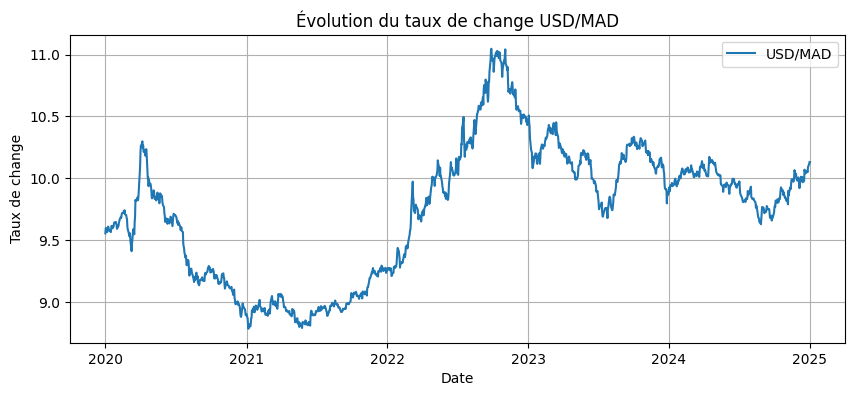

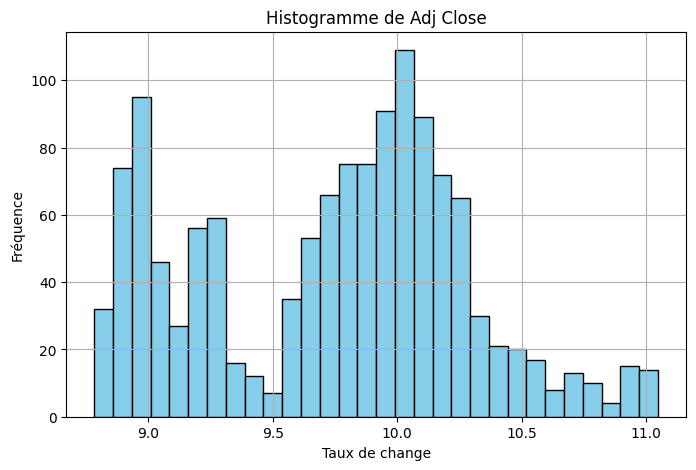

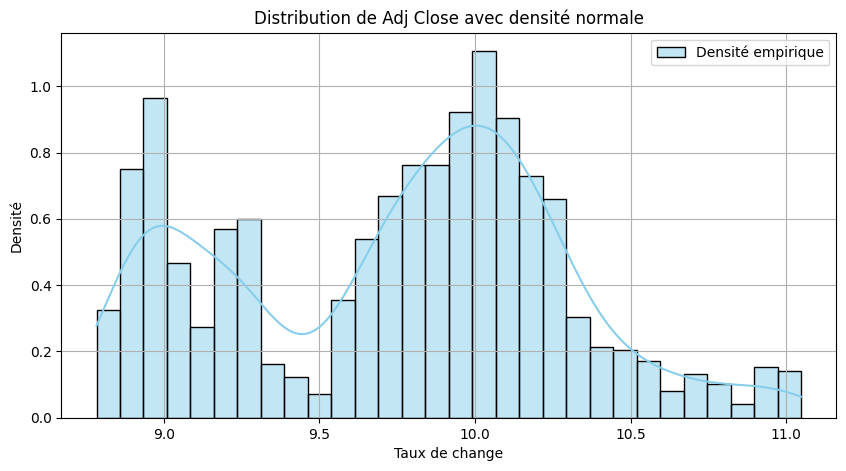

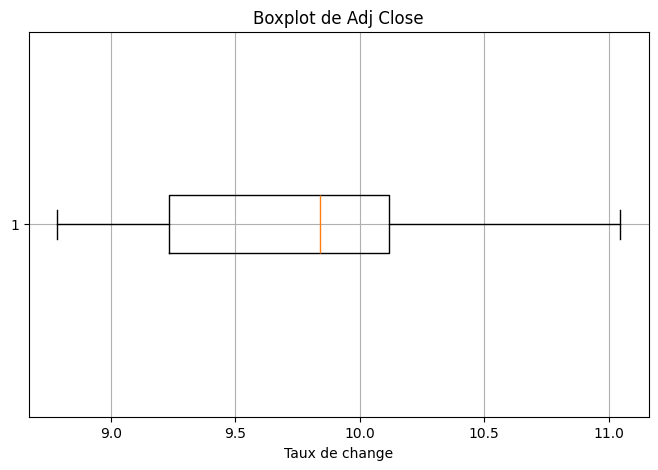

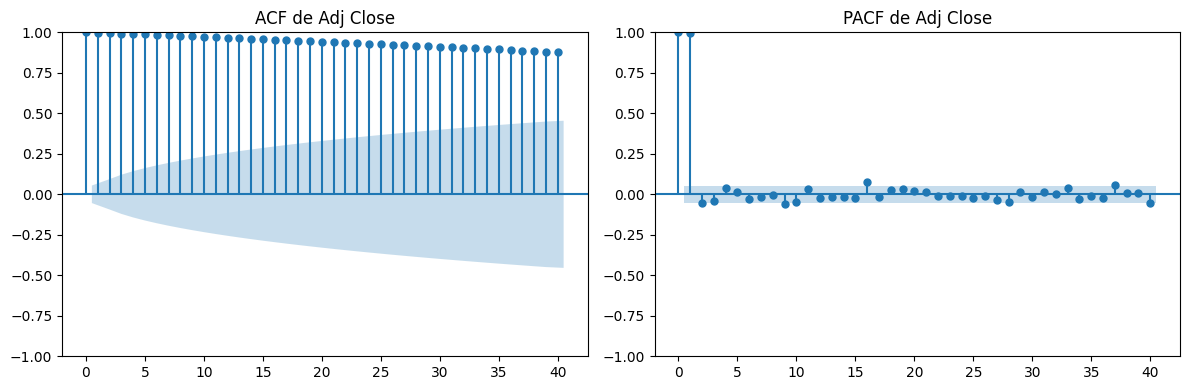

<Figure size 600x400 with 0 Axes>

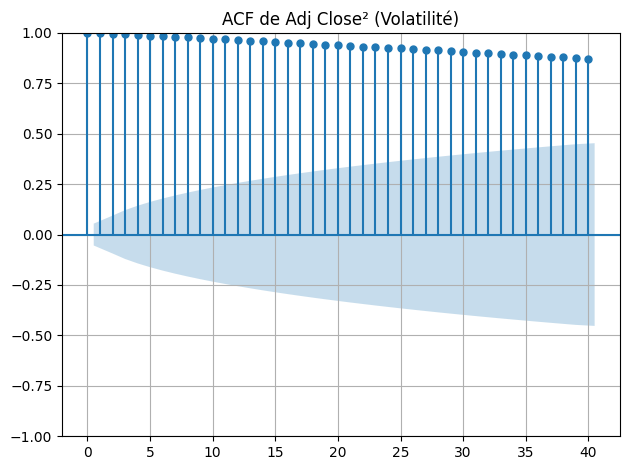


 Statistiques descriptives des rendements logarithmiques :
count    1305.000000
mean        0.000045
std         0.003504
min        -0.019878
25%        -0.001942
50%        -0.000065
75%         0.001991
max         0.017848
Name: Log_Returns, dtype: float64
Skewness : 0.1682
Kurtosis : 3.1974

 Test ADF sur les rendements :
Statistique ADF : -8.7625, p-value : 0.0000
 Les rendements sont stationnaires (p-value < 0.05)

 Test Jarque-Bera sur les rendements :
Statistique JB : 556.1914, p-value : 0.0000
 Les rendements ne suivent pas une loi normale (p-value ≤ 0.05)


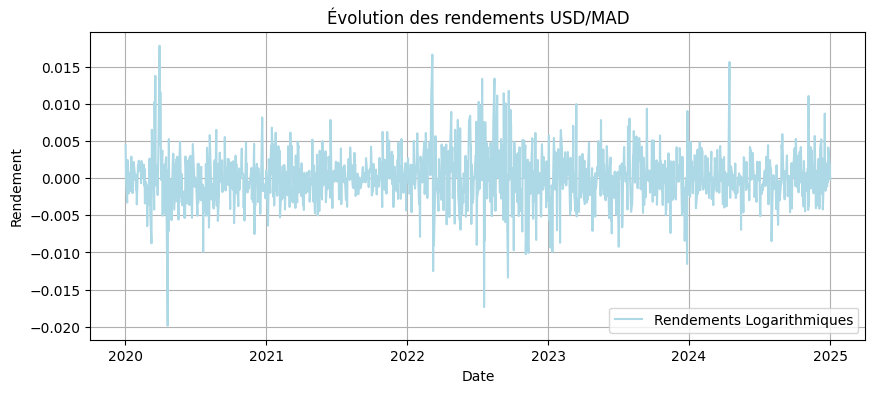

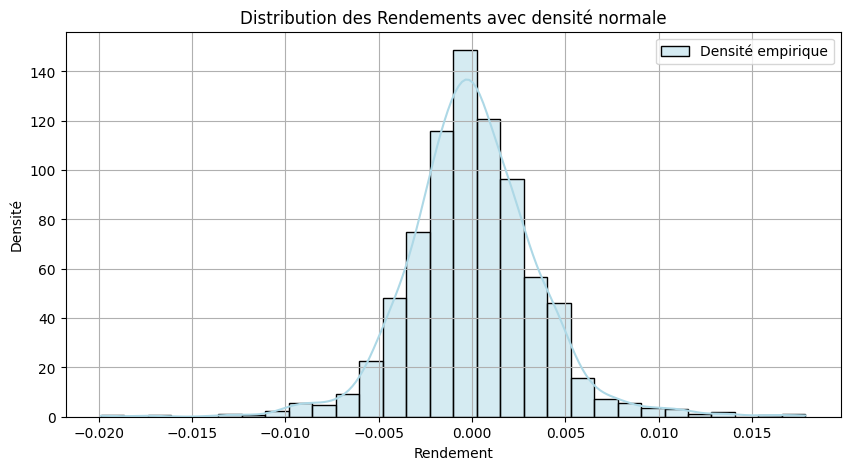

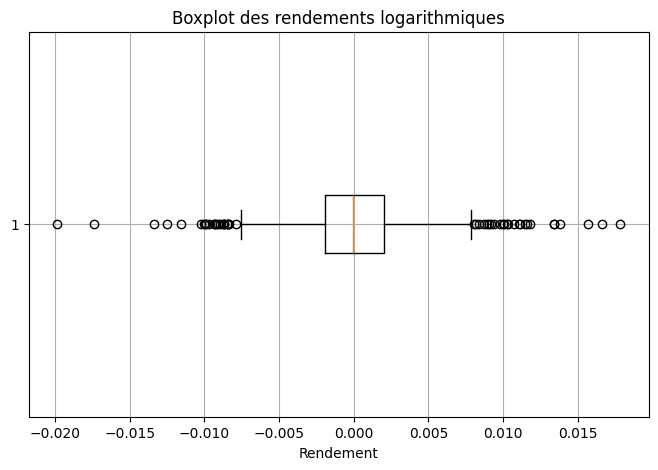

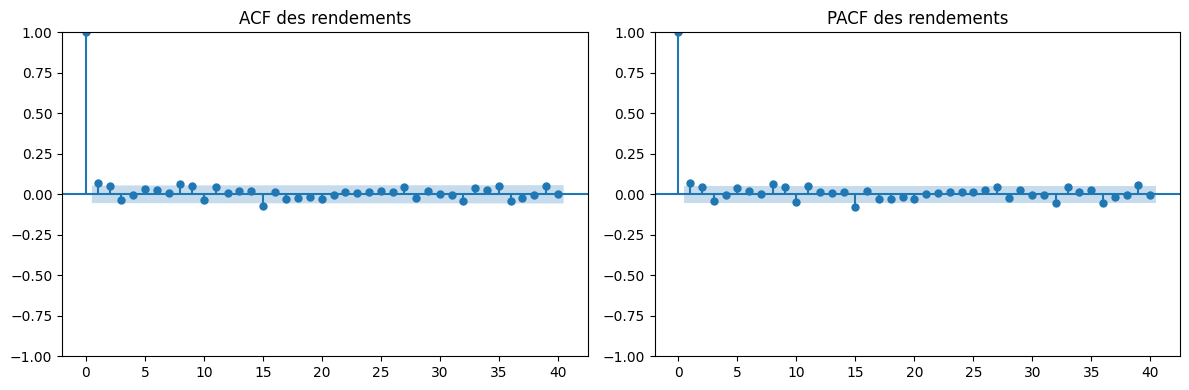

<Figure size 600x400 with 0 Axes>

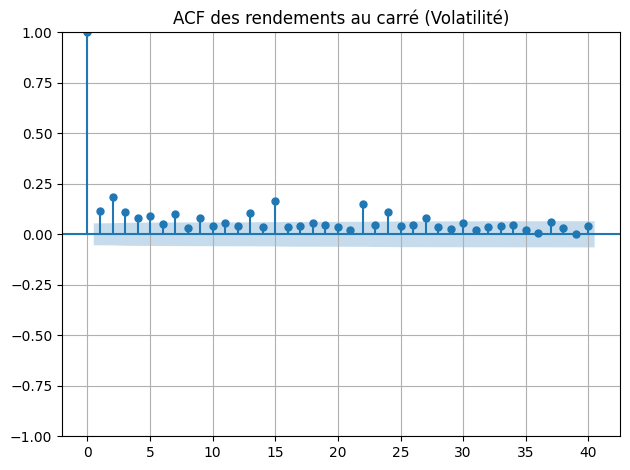

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import jarque_bera, norm


file_path = "/content/USD_MAD Historical Data (17).csv"
data = pd.read_csv(file_path)


data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_values('Date')
data.rename(columns={'Price': 'Adj Close'}, inplace=True)
data = data[['Date', 'Adj Close']]
data.set_index('Date', inplace=True)


print("\n Statistiques descriptives de Adj Close :")
print(data['Adj Close'].describe())
print(f"Skewness : {data['Adj Close'].skew():.4f}")
print(f"Kurtosis : {data['Adj Close'].kurt():.4f}")


adf_result = adfuller(data['Adj Close'])
print("\n Test ADF sur Adj Close :")
print(f"Statistique ADF : {adf_result[0]:.4f}, p-value : {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print(" La série est stationnaire (p-value < 0.05)")
else:
    print(" La série n'est pas stationnaire (p-value ≥ 0.05)")


jb_stat, jb_pvalue = jarque_bera(data['Adj Close'])
print("\n Test Jarque-Bera sur Adj Close :")
print(f"Statistique JB : {jb_stat:.4f}, p-value : {jb_pvalue:.4f}")
if jb_pvalue > 0.05:
    print(" La série suit une loi normale (p-value > 0.05)")
else:
    print(" La série ne suit pas une loi normale (p-value ≤ 0.05)")


plt.figure(figsize=(10, 4))
plt.plot(data['Adj Close'], label="USD/MAD")
plt.title("Évolution du taux de change USD/MAD")
plt.xlabel("Date")
plt.ylabel("Taux de change")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(8, 5))
plt.hist(data['Adj Close'], bins=30, edgecolor='black', color='skyblue')
plt.title("Histogramme de Adj Close")
plt.xlabel("Taux de change")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data['Adj Close'], bins=30, kde=True, stat="density", color="skyblue", edgecolor="black", label="Densité empirique")
x = np.linspace(data['Adj Close'].min(), data['Adj Close'].max(), 1000)
plt.title("Distribution de Adj Close avec densité normale")
plt.xlabel("Taux de change")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.boxplot(data['Adj Close'], vert=False)
plt.title("Boxplot de Adj Close")
plt.xlabel("Taux de change")
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(data['Adj Close'], lags=40, ax=plt.gca())
plt.title("ACF de Adj Close")
plt.subplot(1, 2, 2)
plot_pacf(data['Adj Close'], lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF de Adj Close")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plot_acf(data['Adj Close']**2, lags=40)
plt.title("ACF de Adj Close² (Volatilité)")
plt.grid(True)
plt.tight_layout()
plt.show()


data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data = data.dropna()


print("\n Statistiques descriptives des rendements logarithmiques :")
print(data['Log_Returns'].describe())
print(f"Skewness : {data['Log_Returns'].skew():.4f}")
print(f"Kurtosis : {data['Log_Returns'].kurt():.4f}")


adf_ret = adfuller(data['Log_Returns'])
print("\n Test ADF sur les rendements :")
print(f"Statistique ADF : {adf_ret[0]:.4f}, p-value : {adf_ret[1]:.4f}")
if adf_ret[1] < 0.05:
    print(" Les rendements sont stationnaires (p-value < 0.05)")
else:
    print(" Les rendements ne sont pas stationnaires (p-value ≥ 0.05)")


jb_ret, jb_ret_p = jarque_bera(data['Log_Returns'])
print("\n Test Jarque-Bera sur les rendements :")
print(f"Statistique JB : {jb_ret:.4f}, p-value : {jb_ret_p:.4f}")
if jb_ret_p > 0.05:
    print(" Les rendements suivent une loi normale (p-value > 0.05)")
else:
    print(" Les rendements ne suivent pas une loi normale (p-value ≤ 0.05)")


plt.figure(figsize=(10, 4))
plt.plot(data['Log_Returns'], color="lightblue", label="Rendements Logarithmiques")
plt.title("Évolution des rendements USD/MAD")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data['Log_Returns'], bins=30, kde=True, stat="density", color="lightblue", edgecolor="black", label="Densité empirique")
x = np.linspace(data['Log_Returns'].min(), data['Log_Returns'].max(), 1000)
plt.title("Distribution des Rendements avec densité normale")
plt.xlabel("Rendement")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.boxplot(data['Log_Returns'], vert=False)
plt.title("Boxplot des rendements logarithmiques")
plt.xlabel("Rendement")
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(data['Log_Returns'], lags=40, ax=plt.gca())
plt.title("ACF des rendements")
plt.subplot(1, 2, 2)
plot_pacf(data['Log_Returns'], lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF des rendements")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plot_acf(data['Log_Returns']**2, lags=40)
plt.title("ACF des rendements au carré (Volatilité)")
plt.grid(True)
plt.tight_layout()
plt.show()
